# Assignment: 6

Assignment on Regression technique.

The data consists of temperatures of INDIA averaging the temperatures
of all places month wise. Temperatures values are recorded in CELSIUS

a) Apply Linear Regression using suitable library function and predict the
Month-wise temperature.

b) Assess the performance of regression models using MSE, MAE and R-Square
metrics

c) Visualize simple regression model.

**Dataset Used:** Temperatures

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
# Load dataset
df = pd.read_csv("Temperatures.csv")

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Checking for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

Dataset Preview:
   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  

Missing values in dataset:
YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL  

In [9]:
# Using month-wise temperatures as features and 'ANNUAL' as target
X = df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]
y = df['ANNUAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R-Square: {r2}')

MSE: 0.002440835094691285
MAE: 0.029590158623251355
R-Square: 0.9949515631120867


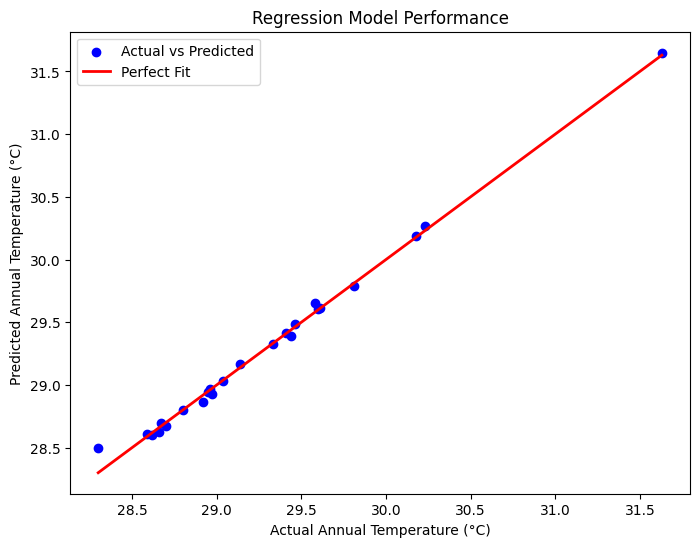

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Fit')
plt.xlabel('Actual Annual Temperature (°C)')
plt.ylabel('Predicted Annual Temperature (°C)')
plt.title('Regression Model Performance')
plt.legend()
plt.show()